In [28]:
import torch
from torch.utils.data import DataLoader
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from dataloader import BEELINEDataset

## Load Data

The data can be found under _/projects/heads/data/BEELINE_

Or you can download them here: https://zenodo.org/records/3701939

In [29]:
# Load GSD dataset from Curated category
dataset = BEELINEDataset(
    base_dir='/home/asp/Downloads/HeaDS/GRN Inference/data/BEELINE',
    #base_dir='/projects/heads/data/BEELINE',
    category='Curated',
    dataset_name='GSD',
    variant='2000-1',
)

# Print metadata
metadata = dataset.get_metadata()
print("Dataset Metadata:")
for key, value in metadata.items():
    print(f"  {key}: {value}")

Dataset Metadata:
  category: Curated
  dataset: GSD
  variant: 2000-1
  n_genes: 19
  n_cells: 2000
  n_edges: 79
  sparsity: 0.0


In [30]:
dataset.expression

,E801_438,E1_769,E1795_733,E645_767,E487_58,E284_5,E1797_596,E1058_571,E426_671,E1421_298,...,E352_148,E569_368,E572_618,E957_655,E1453_33,E1668_701,E1825_132,E1061_461,E1754_124,E840_357
AMH,0.338789,1.841659,0.017036,1.704565,0.038238,0.011146,0.000606,2.096158,0.000708,0.001019,...,0.074625,0.032631,0.006773,1.705811,0.002135,2.007235,0.003299,1.845126,0.098357,0.000424
CBX2,0.002717,0.002191,0.008347,0.000082,2.653297,1.220433,0.013979,0.020615,0.021715,0.043544,...,1.615855,0.014503,0.000526,0.027751,1.572040,0.004051,2.236282,0.041465,1.921999,0.013874
CTNNB1,0.011462,0.005118,1.845364,0.011418,0.000567,0.008931,2.709890,0.011186,2.309222,0.037767,...,0.023540,0.043173,2.015270,0.000748,0.001410,0.038742,0.026806,0.010069,0.011521,1.694148
DHH,0.353490,2.554467,0.009483,2.252899,0.006458,0.005507,0.004086,2.843255,0.000858,0.006225,...,0.013858,0.026466,0.016731,2.681320,0.076652,1.912524,0.015670,2.227554,0.004356,0.025530
DKK1,1.847789,2.208555,0.014649,1.713882,0.012911,0.030232,0.011737,1.691236,0.013728,2.277971,...,0.004687,2.145570,0.001813,2.079796,0.005289,2.060732,0.011654,1.681645,0.007200,0.004514
DMRT1,1.570476,2.207165,0.001894,1.683637,0.025892,0.015465,0.012307,2.012365,0.008868,2.530045,...,0.028461,2.289952,0.069866,2.122326,0.004901,2.412576,0.002592,2.380255,0.001699,0.034871
FGF9,0.552496,1.708263,0.001159,1.753460,0.002862,0.021387,0.054824,1.495256,0.020878,0.000993,...,0.061205,0.022123,0.000306,2.010688,0.002172,2.352512,0.056516,1.840398,0.002197,0.122772
FOXL2,0.010542,0.035365,2.329127,0.008139,0.052882,0.007603,1.978954,0.009379,1.710839,0.048187,...,0.020387,0.036665,2.093225,0.001765,0.002137,0.009410,0.020031,0.002129,0.046130,1.738225
GATA4,2.107367,2.257457,1.777964,1.725430,2.317660,0.797651,1.487072,1.973682,2.105743,1.709693,...,1.470885,2.889991,1.958052,1.884727,1.451098,1.132894,1.932312,2.344368,2.058861,2.009438
NR0B1,1.859390,0.071098,1.992085,0.013730,0.045446,0.001165,2.114296,0.101041,2.202564,1.787936,...,1.841805,2.188810,1.869548,0.004422,0.000728,0.070532,2.356923,0.058909,1.911860,1.726000


In [31]:
dataset.gene_names[:5]

['AMH', 'CBX2', 'CTNNB1', 'DHH', 'DKK1']

In [32]:
dataset.cell_names[:5]

['E801_438', 'E1_769', 'E1795_733', 'E645_767', 'E487_58']

In [33]:
dataset.adjacency[:5, :5]

array([[ 0.,  0., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [-1., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]], dtype=float32)

In [34]:
dataset.pseudotime

,cell_name,pseudotime
0,E801_438,0.54762
1,E1_769,0.96241
2,E1795_733,0.91729
3,E645_767,0.95990
4,E487_58,0.07143
...,...,...
1995,E1668_701,0.87719
1996,E1825_132,0.16416
1997,E1061_461,0.57644
1998,E1754_124,0.15414


In [35]:
dataset.lineage

,cell_name,lineage
0,E801_438,2
1,E1_769,2
2,E1795_733,1
3,E645_767,2
4,E487_58,2
...,...,...
1995,E1668_701,2
1996,E1825_132,1
1997,E1061_461,2
1998,E1754_124,2


## PyTorch

In [36]:
# Get all data at once
full_data = dataset.get_full_data()

print("Full dataset components:")
for key, value in full_data.items():
    if isinstance(value, torch.Tensor):
        print(f"  {key}: {value.shape} (dtype: {value.dtype})")
    elif isinstance(value, list):
        print(f"  {key}: {len(value)} items")
    else:
        print(f"  {key}: {type(value)}")

# Create DataLoader for batch processing
dataloader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=True,
    num_workers=0
)

print(f"Total number of batches: {len(dataloader)}")
print(f"Dataset length: {len(dataset)}\n")

Full dataset components:
  expression: torch.Size([2000, 19]) (dtype: torch.float32)
  adjacency: torch.Size([19, 19]) (dtype: torch.float32)
  gene_names: 19 items
  cell_names: 2000 items
  pseudotime: <class 'pandas.core.frame.DataFrame'>
  lineage: <class 'pandas.core.frame.DataFrame'>
Total number of batches: 63
Dataset length: 2000



## 5. Visualize Expression Data Distribution

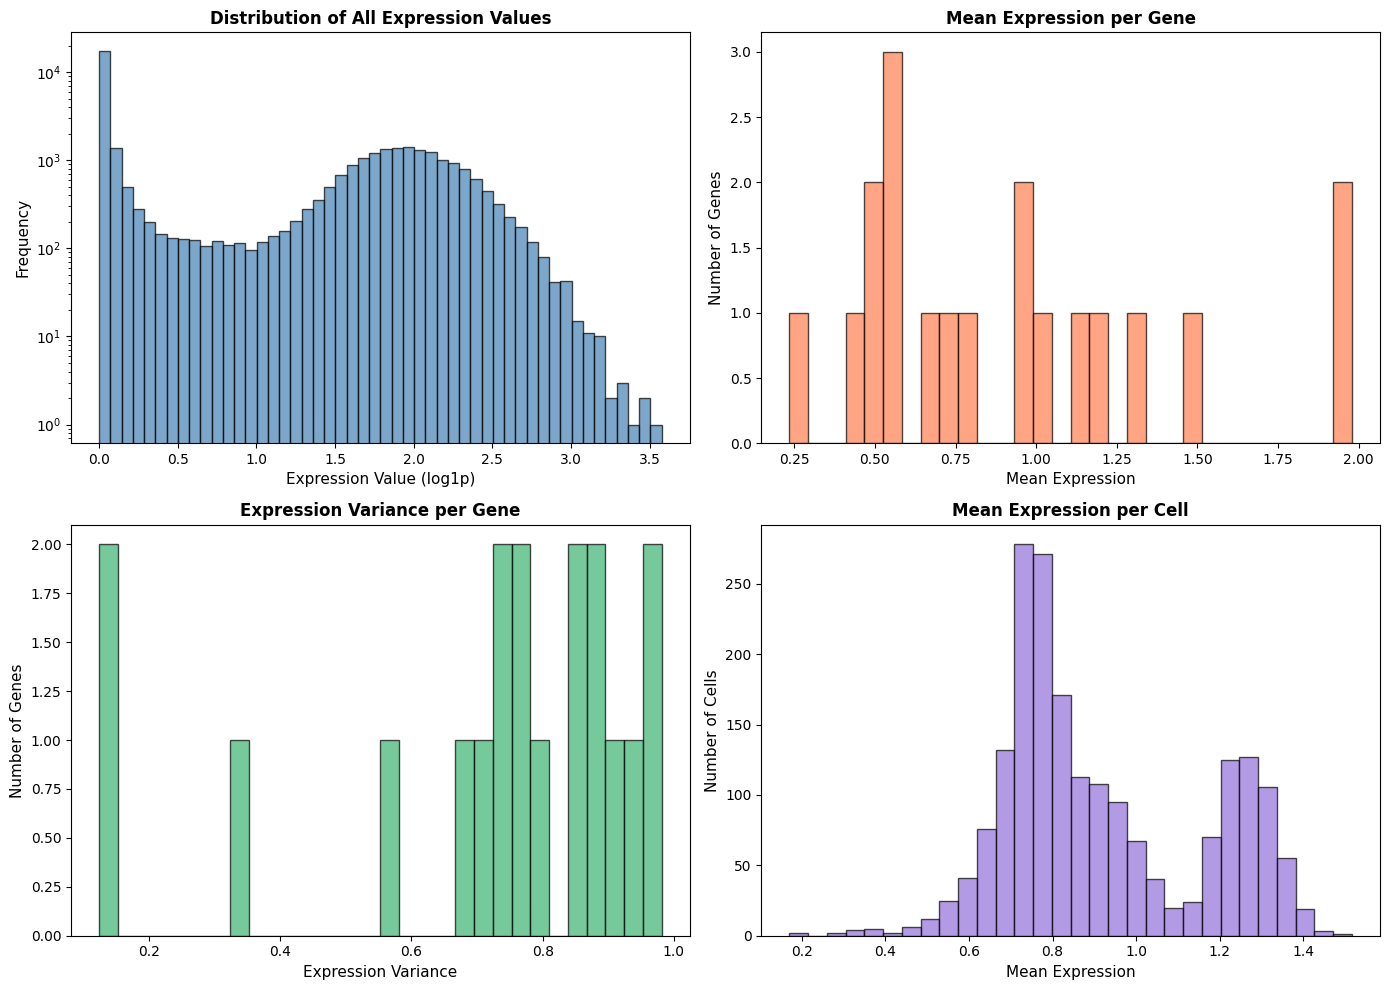

Expression data shape: (2000, 19) (cells x genes)
Overall statistics:
  Mean: 0.9170
  Std: 0.9748
  Min: 0.0000
  Max: 3.5762


In [37]:
# Plot expression distribution
expr_data = full_data['expression'].numpy()

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Histogram of all expression values
axes[0, 0].hist(expr_data.flatten(), bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0, 0].set_xlabel('Expression Value (log1p)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Distribution of All Expression Values', fontsize=12, fontweight='bold')
axes[0, 0].set_yscale('log')

# 2. Mean expression per gene
mean_expr_per_gene = expr_data.mean(axis=0)
axes[0, 1].hist(mean_expr_per_gene, bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[0, 1].set_xlabel('Mean Expression', fontsize=11)
axes[0, 1].set_ylabel('Number of Genes', fontsize=11)
axes[0, 1].set_title('Mean Expression per Gene', fontsize=12, fontweight='bold')

# 3. Expression variance per gene
var_expr_per_gene = expr_data.var(axis=0)
axes[1, 0].hist(var_expr_per_gene, bins=30, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[1, 0].set_xlabel('Expression Variance', fontsize=11)
axes[1, 0].set_ylabel('Number of Genes', fontsize=11)
axes[1, 0].set_title('Expression Variance per Gene', fontsize=12, fontweight='bold')

# 4. Mean expression per cell
mean_expr_per_cell = expr_data.mean(axis=1)
axes[1, 1].hist(mean_expr_per_cell, bins=30, edgecolor='black', alpha=0.7, color='mediumpurple')
axes[1, 1].set_xlabel('Mean Expression', fontsize=11)
axes[1, 1].set_ylabel('Number of Cells', fontsize=11)
axes[1, 1].set_title('Mean Expression per Cell', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"Expression data shape: {expr_data.shape} (cells x genes)")
print(f"Overall statistics:")
print(f"  Mean: {expr_data.mean():.4f}")
print(f"  Std: {expr_data.std():.4f}")
print(f"  Min: {expr_data.min():.4f}")
print(f"  Max: {expr_data.max():.4f}")

## 6. Visualize GRN Structure

In [ ]:
# Visualize adjacency matrix
adj_matrix = full_data['adjacency'].numpy()

# Print GRN statistics
n_edges = (adj_matrix != 0).sum()
n_activation = (adj_matrix > 0).sum()
n_repression = (adj_matrix < 0).sum()

print(f"GRN Statistics:")
print(f"  Total edges: {n_edges}")
print(f"  Activation edges (+1): {n_activation}")
print(f"  Repression edges (-1): {n_repression}")
print(f"  Neutral edges (0): {adj_matrix.size - n_edges}")

# Compute correlation matrix for all genes
corr_matrix = np.corrcoef(expr_data.T)

# Plot side by side
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 1. GRN Adjacency Matrix
sns.heatmap(adj_matrix, 
            cmap='RdBu_r', 
            center=0, 
            vmin=-1, 
            vmax=1,
            ax=axes[0],
            square=True,
            cbar_kws={'label': 'Edge Weight'})
axes[0].set_title('Ground Truth GRN', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Target Gene', fontsize=11)
axes[0].set_ylabel('Source Gene', fontsize=11)

# 2. Gene-Gene Correlation Matrix
sns.heatmap(corr_matrix, 
            cmap='coolwarm', 
            center=0, 
            vmin=-1, 
            vmax=1,
            ax=axes[1],
            square=True,
            cbar_kws={'label': 'Correlation'})
axes[1].set_title('Expression Correlation', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Gene Index', fontsize=11)
axes[1].set_ylabel('Gene Index', fontsize=11)

plt.tight_layout()
plt.show()

GRN Statistics:
  Total edges: 79
  Activation edges (+1): 52
  Repression edges (-1): 27
  Neutral edges (0): 282
